In [0]:
from google.colab import files
uploaded = files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
! cp "/content/drive/My Drive/Dataset/A_Z Handwritten Data.csv" /content/

In [4]:
import pandas as pd
rawdata = pd.read_csv('A_Z Handwritten Data.csv', header=None)
rawdata.shape

(372451, 785)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

label_name = [chr(i+65) for i in range(26)]
print(label_name)

label = np.array(rawdata)[:,0]
feature = np.array(rawdata)[:,1:785]
print("資料的類別數量：%s" %Counter(label))
print(feature.shape)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
資料的類別數量：Counter({14: 57825, 18: 48419, 20: 29008, 2: 23409, 19: 22495, 15: 19341, 13: 19010, 0: 13870, 12: 12336, 11: 11586, 17: 11566, 4: 11440, 24: 10859, 22: 10784, 3: 10134, 1: 8668, 9: 8493, 7: 7218, 23: 6272, 25: 6076, 16: 5812, 6: 5762, 10: 5603, 21: 4182, 5: 1163, 8: 1120})
(372451, 784)


(28, 28)


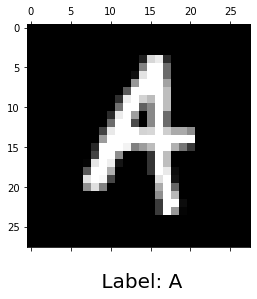

In [6]:
first_label = label[0]
first_label_name = label_name[0]
first_img = feature[0].reshape(28,28)
print(first_img.shape)

plt.matshow(first_img, cmap = plt.get_cmap('gray'))
plt.xlabel("\n Label: %s" %(first_label_name), size=20)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(feature, label, random_state = 0, test_size = 0.4)

print("訓練集數量", len(train_x))
print("測試集數量", len(test_x))
print("訓練集類別數量：%s" %Counter(train_y))
print("測試集類別數量：%s" %Counter(test_y))

訓練集數量 223470
測試集數量 148981
訓練集類別數量：Counter({14: 34516, 18: 29167, 20: 17541, 2: 14008, 19: 13589, 15: 11689, 13: 11345, 0: 8269, 12: 7380, 11: 6925, 17: 6909, 4: 6862, 24: 6529, 22: 6497, 3: 6080, 1: 5171, 9: 5088, 7: 4322, 23: 3772, 25: 3654, 16: 3451, 6: 3440, 10: 3405, 21: 2521, 5: 698, 8: 642})
測試集類別數量：Counter({14: 23309, 18: 19252, 20: 11467, 2: 9401, 19: 8906, 13: 7665, 15: 7652, 0: 5601, 12: 4956, 11: 4661, 17: 4657, 4: 4578, 24: 4330, 22: 4287, 3: 4054, 1: 3497, 9: 3405, 7: 2896, 23: 2500, 25: 2422, 16: 2361, 6: 2322, 10: 2198, 21: 1661, 8: 478, 5: 465})


In [8]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0) #max_depth
DT.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

predictions = DT.predict(test_x)
cm = confusion_matrix(test_y, predictions)
acc = accuracy_score(test_y, predictions)

print("決策樹準確度:%0.3f" %(acc))
df = pd.DataFrame(cm, columns=label_name)
df['Label'] = label_name
df

決策樹準確度:0.925


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,Label
0,4958,33,12,20,14,5,18,75,2,6,11,8,67,46,25,60,24,92,15,6,24,0,36,13,15,16,A
1,39,2849,25,56,51,0,47,34,2,10,11,10,20,15,65,14,18,44,103,3,23,0,9,12,10,27,B
2,2,20,8944,4,56,0,26,12,3,8,10,67,2,10,76,13,15,38,21,4,28,0,10,4,7,21,C
3,19,46,5,3493,9,0,6,4,0,18,2,6,10,18,285,22,19,5,27,7,28,1,11,2,2,9,D
4,28,31,80,7,4128,8,30,6,3,4,16,21,8,5,10,16,2,44,66,11,8,2,6,6,10,22,E
5,2,0,4,2,13,370,5,1,0,3,4,1,0,2,0,24,1,7,6,13,0,0,4,1,1,1,F
6,23,29,29,6,33,5,1963,14,2,11,9,7,11,6,26,0,35,14,60,5,15,0,12,1,1,5,G
7,85,10,3,0,11,1,11,2407,0,4,19,3,48,132,2,11,6,17,7,9,44,1,28,3,27,7,H
8,1,1,1,4,5,0,0,1,381,11,0,4,0,0,2,1,0,0,10,10,2,0,2,3,4,35,I
9,5,7,9,23,12,1,5,2,16,3010,6,2,4,3,13,10,10,6,127,62,30,5,0,8,23,6,J


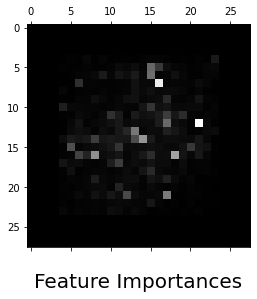

In [16]:
DT_feature_importances = DT.feature_importances_.reshape(28,28)

plt.matshow(DT_feature_importances, cmap = plt.get_cmap('gray'))
plt.xlabel("\nFeature Importances", size=20)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, random_state=0)
RF.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
predictions = RF.predict(test_x)
cm = confusion_matrix(test_y, predictions)
acc = accuracy_score(test_y, predictions)

print("隨機森林準確度:%0.3f" %(acc))
df = pd.DataFrame(cm, columns=label_name)
df['Label'] = label_name
df

隨機森林準確度:0.979


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,Label
0,5525,3,0,4,2,0,0,2,0,0,8,3,14,5,12,2,0,5,7,0,5,0,0,0,4,0,A
1,27,3324,2,26,5,0,5,0,0,0,0,2,4,0,40,3,2,19,29,0,1,0,0,2,0,6,B
2,0,2,9279,0,5,0,4,0,0,0,0,26,0,6,47,10,0,4,2,2,8,0,2,0,2,2,C
3,2,6,0,3780,0,0,0,0,0,6,0,0,2,2,223,9,5,0,15,0,3,0,1,0,0,0,D
4,4,9,59,0,4446,0,10,0,0,0,1,3,0,0,2,7,0,13,14,2,0,0,2,0,1,5,E
5,1,0,0,0,7,423,0,0,0,0,0,0,0,0,0,26,0,1,2,5,0,0,0,0,0,0,F
6,16,12,24,2,11,0,2171,0,0,0,0,2,3,2,21,5,14,4,23,2,7,0,3,0,0,0,G
7,61,2,0,0,2,0,0,2672,0,2,4,0,20,86,2,3,0,4,0,0,18,0,10,0,10,0,H
8,0,0,0,0,0,0,0,0,454,6,0,0,0,0,0,1,0,0,9,1,0,0,0,0,0,7,I
9,0,2,0,5,2,0,0,0,0,3245,0,0,2,0,4,0,0,0,73,52,10,2,4,0,2,2,J


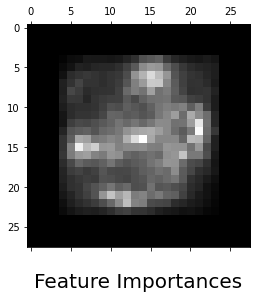

In [19]:
RF_feature_importances = RF.feature_importances_.reshape(28,28)

plt.matshow(RF_feature_importances, cmap = plt.get_cmap('gray'))
plt.xlabel("\nFeature Importances", size=20)
plt.show()

In [0]:
from sklearn.externals import joblib 

#儲存Model
joblib.dump(DT, 'DecisionTreeClassifier_Alphabets.pkl')

#讀取Model
DT = joblib.load('DecisionTreeClassifier_Alphabets.pkl')